<a href="https://colab.research.google.com/github/jgrunewald6/test/blob/master/6130_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Electrochemical Engineering Project 

First we need to import the modules

In [0]:
import scipy
import numpy as np
from scipy.integrate import ode 
from scipy.integrate import odeint
from matplotlib import pyplot as plt

In [0]:
#@title Reactor Parameters


reactor_length = 5 #@param {type:"slider", min:0, max:10, step:0.1}
## unit for length =m

kappa = 50 ## (S/m) This is the value for seawater
# S = s^3 A^2 kg^-1 m^-2
F = 96485 ##(C/mol)
v_x = 2.66e-2 ## (m/s)
a = 15000 ##(m-1)
c_0 = 2 ##(mol/m3)
k_m = 1e-4 ##(m/s)
# We need real numbers for the things below
io = 10 ** -4 ##(A/m^-2)
R = 8.314 ##(J/mol K)
T = 300 ##K
n = 1
U_Ag = 1.2 # we need to put in the redox couples of our reactions
porosity = 0.45
alpha_a = 0.5

Now we need to put in our three eqns: (Mass Balance, Butler-Volmer, and Ohm's Law)


[Ohm's Law](https://en.wikipedia.org/wiki/Ohm%27s_law):

$$ \frac{d\phi}{dx} = -\frac{i}{\kappa} $$

[The Bulter-Volmer Equation](https://en.wikipedia.org/wiki/Butler%E2%80%93Volmer_equation):

$$i = i_0(e^{\frac{ \alpha_a \eta_s F}{RT}} - e^{\frac{- \alpha_a \eta_s F}{RT}})$$

[Mass Balance:](https://en.wikipedia.org/wiki/Mass_balance#Introduction)

$$\frac{dC}{dx} = \frac{Ak_mC_0}{v_x}$$

The function evaluating the ode takes in a vector that looks like this:

\begin{pmatrix} \eta_s  \\ i  \\ c \end{pmatrix}



In [0]:
def Limiting_Current(y, n = n, F = F,
                    a = a, k_m = k_m, c_0 = c_0, 
                    porosity = porosity, v_x = v_x,
                    alpha_a = alpha_a):
  """
  Function that evaluates the Butler-Volmer equation
  """
  alpha = a * k_m / porosity / v_x
  #return 1.947*np.exp(19.47*phi)/(-0.00518 + np.exp(19.47*phi)*c)**2
  return -n * F * a * k_m * c_0 * np.exp(-alpha * y)

def Current_Derivative(x, phi, i, n = n, F = F,
                    a = a, k_m = k_m, c_0 = c_0, 
                    porosity = porosity, v_x = v_x,
                    alpha_a = alpha_a, U = U_Ag):
  """
  Function that evaluates the derivative of current with respect to x.
  This function decides if the system is at limiting current, and if it is not
  it applies linear kinetics
  """
  eta = phi - U  
  # compare currents from linear kinetics and mass transfer limited
  i_lin = io * alpha_a * F / R / T * eta
  i_mass = n * F * k_m * c_0
  
  # if the current obtained from linear kinetics exceeds the limiting current
  # retrun the limiting current
  if i_lin < i_mass:
    return -i_o * alpha_a * F / R / T * Ohms_Law(i)
  else:
    return -n * F * k_m * Mass_Balance(c_0)
  
# def Mass_Balance2(c, a = a, k_m = k_m, 
#                  v_x = v_x, c_0 = c_0):
#   """
#   Function that evaluates the derivative of the mass balance at a point
#   """
#   #return a * k_m / v_x * c_0  # mass transfer version
#   return - a * k_m * c / porosity / v_x # kinetics version

def Ohms_Law(i, kappa = kappa):
  """
  This Function evaluates Ohm's Law.
  """
  return -i / kappa
  
def Mass_Balance(c, a = a, k_m = k_m, 
                 v_x = v_x, c_0 = c_0):
  """
  Function that evaluates the derivative of the mass balance at a point
  """
  #return a * k_m / v_x * c_0  # mass transfer version
  return - a * k_m * c / porosity / v_x # kinetics version

def Mass_Balance_AgComp(c, a = a, k_m = k_m, 
                 v_x = v_x, c_0 = c_0):
  """
  Function that evaluates the derivative of the mass balance at a point
  """
  #return a * k_m / v_x * c_0  # mass transfer version
  return - a * k_m * c / porosity / v_x # kinetics version

def pend_ben2(y,x):
#   """
#   Function takes in a vector of input parameters and returns the value of the
#   derviatives of the three governing equations: the mass balance, Butler-
#   volmer, and ohm's law
  
#   inputs:
#     y (list):
#       a list containing the potential (V), current density (A/m^2), and 
      
#   returns:
#     dydt (list):
#       a list containing the values of Ohm's Law, the Butler-Volmer Current,
#       and the mass balance
  
#   """
  phi, i, c, c2 = y
  # evaluate all the equations
  dydt = [Ohms_Law(i),
          Limiting_Current(x),
          Mass_Balance(c), Mass_Balance_AgComp]
  return dydt

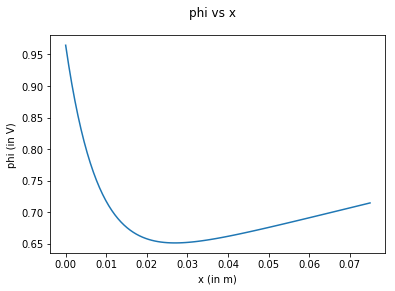

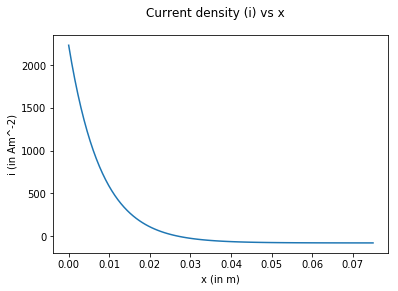

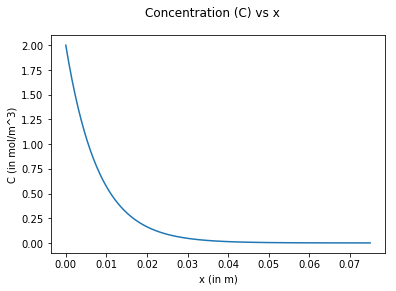

interactive(children=(FloatSlider(value=0.025, description='reac_length', max=0.05, step=0.001), Output()), _d…

In [0]:
#trying to keep reactor length  definition, solver and plot in same cell so that change can be observed without running a bunch of cells each time.

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets
from scipy.integrate import solve_bvp


#phi'(x) = kappa*i'(x)
#i'(x) = i_0*(np.exp(alpha_a*eta_s*F/R/T)-np.exp(-alpha_c*eta_s*F/R/T))
#c'(x) = a*k_m/v_x*c_0
  
#y0 = [1,2000,c_0]

def get_x_and_solve_thenPlot(reac_length):  
  x = np.linspace(0,reac_length,100) #Final reactor length should come from the slider
  #y_1 = np.zeros((2,x.size))
  #y_1[0,1] = 1
  #y_1[0,3] = -1
  y0 = [1.0,2440.0,c_0,]
  for i in range(2):
      sol = odeint(pend_ben2, y0, x)
      y0 = [sol[1,0],sol[1,1],c_0]
  plt.plot(x,sol[:,0])
  plt.suptitle('phi vs x')
  plt.xlabel('x (in m)')
  plt.ylabel('phi (in V)')
  plt.show() # potential
  plt.plot(x,sol[:,1])
  plt.suptitle('Current density (i) vs x')
  plt.xlabel('x (in m)')
  plt.ylabel('i (in Am^-2)')
  plt.show() # current
  plt.plot(x,sol[:,2])
  plt.suptitle('Concentration (C) vs x')
  plt.xlabel('x (in m)')
  plt.ylabel('C (in mol/m^3)')
  plt.show() # concentration
  return plt
get_x_and_solve_thenPlot(0.075)
interact(get_x_and_solve_thenPlot, reac_length=(0.0,0.05,0.001));
#interact(test, reac_length=widgets.IntSlider(min=0,max=10,step=1,value=10))

####                                  NOTE: This is supposed to show the plots, but the plots aren't getting displayed
## for reference see "Interactive Visualizations": https://blog.dominodatalab.com/interactive-dashboards-in-jupyter/
# orange is current, blue is potential, green is concentration